In [109]:
import requests
import pandas as pd

# constuct the base url
base_url= 'http://api.worldweatheronline.com/premium/v1/past-weather.ashx'

# Define variable
date= '2024-07-01'
end_date= '2024-07-31'
tp= '3' # time interval in hours

# Define parameters
params = {
  'key': '7c1f0d907a97459994291449240508',
  'q': 'Mashhad, Iran',
  'format': 'json',
  'date': date,
  'enddate': end_date,
  'fx': 'yes', #normal weather output
  'mca': 'no', # monthly climate average output.
  'fx24': 'yes', # Returns 24 hourly weather information in a 3 hourly interval response.
  'showlocaltime': 'yes',
  'aqi': 'no' # return air quality data
  }

# Make a GET request to the API with the required parameters
response= requests.get(base_url, params= params)

# check if the request was succesful
if response.status_code== 200:
  raw_data= response.json() # Parse the JSON data into a Python dictionary
  print('Request succesful.')
  print(raw_data)
else:
  print(f'Request failed with status code: {response.status_code}')

Request succesful.
{'data': {'request': [{'type': 'City', 'query': 'Mashhad, Iran'}], 'time_zone': [{'localtime': '2024-08-10 22:50', 'utcOffset': '3.50', 'zone': 'Asia/Tehran'}], 'weather': [{'date': '2024-07-01', 'astronomy': [{'sunrise': '04:18 AM', 'sunset': '06:53 PM', 'moonrise': '12:17 AM', 'moonset': '02:27 PM', 'moon_phase': 'Waning Crescent', 'moon_illumination': '26'}], 'maxtempC': '30', 'maxtempF': '85', 'mintempC': '21', 'mintempF': '69', 'avgtempC': '25', 'avgtempF': '78', 'totalSnow_cm': '0.0', 'sunHour': '14.0', 'uvIndex': '7', 'hourly': [{'time': '0', 'tempC': '23', 'tempF': '74', 'windspeedMiles': '4', 'windspeedKmph': '6', 'winddirDegree': '32', 'winddir16Point': 'NNE', 'weatherCode': '113', 'weatherIconUrl': [{'value': 'https://cdn.worldweatheronline.com/images/wsymbols01_png_64/wsymbol_0008_clear_sky_night.png'}], 'weatherDesc': [{'value': 'Clear'}], 'precipMM': '0.0', 'precipInches': '0.0', 'humidity': '33', 'visibility': '10', 'visibilityMiles': '6', 'pressure': 

In [110]:
df= pd.DataFrame(raw_data)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, request to weather
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    3 non-null      object
dtypes: object(1)
memory usage: 48.0+ bytes


,data
request,"[{'type': 'City', 'query': 'Mashhad, Iran'}]"
time_zone,"[{'localtime': '2024-08-10 22:50', 'utcOffset'..."
weather,"[{'date': '2024-07-01', 'astronomy': [{'sunris..."


In [115]:
import csv  # Import the csv module for handling CSV file operations

daily_weather = df['data']['weather']

# Initialize an empty list to store hourly weather data entries
hourly_data_list = []

# Loop through each item in the hourly weather data
for day in daily_weather:
  for hour in day['hourly']:

    # Create a dictionary for each hourly entry with relevant data
    hourly_entry = {
        'location': df['data']['request'][0]['query'],  # Get the location from the request data
        'date': day['date'], # Get the date from the weather data
        'time': hour['time'], # Get the time from the weather data
        'tempC': hour['tempC'], # Get the temperature in Celsius from the weather data
        'windspeedKmph': hour['windspeedKmph'], # Get the wind speed in kilometers per hour from the weather data
        'humidity': hour['humidity'], # Get the humidity from the weather data
    }

    # Append the hourly entry to the list
    hourly_data_list.append(hourly_entry)

# Convert the list of hourly entries into a DataFrame for easier manipulation
hourly_df = pd.DataFrame(hourly_data_list)

# Display the DataFrame (optional, for debugging or visualization)
print(hourly_df)

# Save the DataFrame to a CSV file named 'hourly_weather_data.csv', including row indices
hourly_df.to_csv('hourly_weather_data_July_2024.csv', index=True)

          location        date  time tempC windspeedKmph humidity
0    Mashhad, Iran  2024-07-01     0    23             6       33
1    Mashhad, Iran  2024-07-01   300    22             9       36
2    Mashhad, Iran  2024-07-01   600    23            11       36
3    Mashhad, Iran  2024-07-01   900    26            15       31
4    Mashhad, Iran  2024-07-01  1200    29            26       27
..             ...         ...   ...   ...           ...      ...
243  Mashhad, Iran  2024-07-31   900    30            11       24
244  Mashhad, Iran  2024-07-31  1200    34            14       18
245  Mashhad, Iran  2024-07-31  1500    36            17       15
246  Mashhad, Iran  2024-07-31  1800    33            19       18
247  Mashhad, Iran  2024-07-31  2100    29             8       22

[248 rows x 6 columns]


In [116]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=hourly_df)

https://docs.google.com/spreadsheets/d/12ij0NcfbhE6tQpzk86UgzB_XNxxhiEtLt_6M9RKY6rw#gid=0


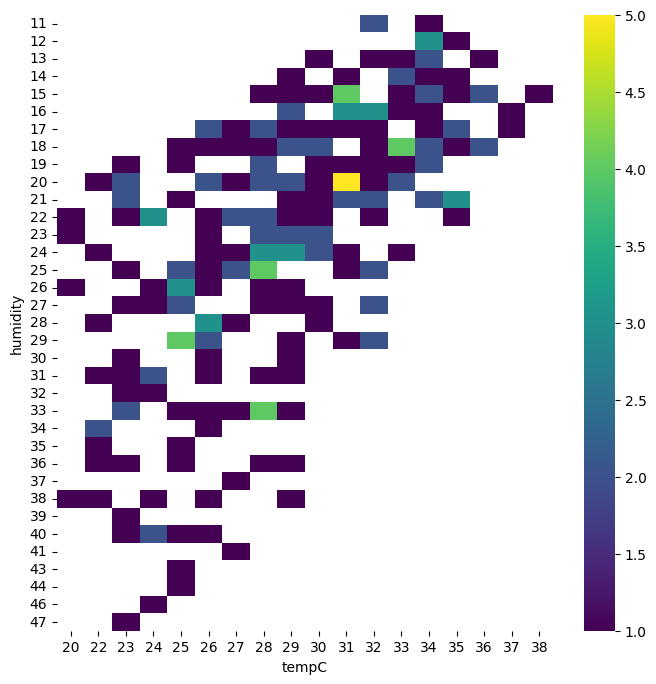

In [113]:
# @title tempC vs Humidity

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['humidity'].value_counts()
    for x_label, grp in hourly_df.groupby('tempC')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('tempC')
_ = plt.ylabel('humidity')